<a href="https://colab.research.google.com/github/duarteluisf/duarteluisf/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Exploração de Dados**

Trata-se de um `dataframe` que contém informações sobre clientes de uma instituição financeira. Estamos interessados em saber o porquê um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
link = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv'

df = pd.read_csv(link, na_values = 'na')

df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [ ]:
n_linhas_total, _ = df.shape
_ , n_colunas_total = df.shape

print(f'O número de linhas do dataframe é  {n_linhas_total}.')
print(f'O número de colunas do dataframe é {n_colunas_total}.')

O número de linhas do dataframe é  10127.
O número de colunas do dataframe é 16.


In [ ]:
n_linhas_adimplentes, _ = df[df['default'] == 0].shape
n_linhas_inadimplentes, _ = df[df['default'] == 1].shape

print(f'O número de clientes adimplentes é {n_linhas_adimplentes} e a proporção é de {round((n_linhas_adimplentes/n_linhas_total)*100, 2)}%.')
print(f'O número de clientes inadimplentes é {n_linhas_inadimplentes} e a proporção é de {round((n_linhas_inadimplentes/n_linhas_total)*100, 2)}%.')

O número de clientes adimplentes é 8500 e a proporção é de 83.93%.
O número de clientes inadimplentes é 1627 e a proporção é de 16.07%.


### **1.1. Schema** 

O `dataframe` conta com 16 variáveis, sendo **sete categóricas** e **nove numéricas**. Entretanto, duas variáveis consideradas categóricas são, na realidade, numéricas: `limite de crédito` e `valor de transações nos últimos 12 meses`.

In [ ]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**.

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"1.388,72",3


In [ ]:
df.drop('id', axis = 1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **1.2. Dados faltantes** 

> É necessário verificar a presença de dados faltantes. Observa-se que as variáveis que possuem dados faltantes são: `escolaridade`, `estado civil` e `salário anual`. A proporção de dados faltantes nas três variáveis é semelhante quando o cliente é adimplente ou inamdimplente. 

In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [ ]:
round((df.isnull().sum()/df.shape[0])*100, 2)

id                          0.00
default                     0.00
idade                       0.00
sexo                        0.00
dependentes                 0.00
escolaridade               15.00
estado_civil                7.40
salario_anual              10.98
tipo_cartao                 0.00
meses_de_relacionamento     0.00
qtd_produtos                0.00
iteracoes_12m               0.00
meses_inativo_12m           0.00
limite_credito              0.00
valor_transacoes_12m        0.00
qtd_transacoes_12m          0.00
dtype: float64

In [ ]:
round((df[df['default'] == 0].isnull().sum()/df[df['default'] == 0].shape[0])*100, 2)

id                          0.00
default                     0.00
idade                       0.00
sexo                        0.00
dependentes                 0.00
escolaridade               14.86
estado_civil                7.29
salario_anual              10.88
tipo_cartao                 0.00
meses_de_relacionamento     0.00
qtd_produtos                0.00
iteracoes_12m               0.00
meses_inativo_12m           0.00
limite_credito              0.00
valor_transacoes_12m        0.00
qtd_transacoes_12m          0.00
dtype: float64

In [ ]:
((df[df['default'] == 1].isnull().sum()/df[df['default'] == 1].shape[0])*100, 2)

(id                          0.000000
 default                     0.000000
 idade                       0.000000
 sexo                        0.000000
 dependentes                 0.000000
 escolaridade               15.734481
 estado_civil                7.928703
 salario_anual              11.493546
 tipo_cartao                 0.000000
 meses_de_relacionamento     0.000000
 qtd_produtos                0.000000
 iteracoes_12m               0.000000
 meses_inativo_12m           0.000000
 limite_credito              0.000000
 valor_transacoes_12m        0.000000
 qtd_transacoes_12m          0.000000
 dtype: float64, 2)

# **2\. Transformação e limpeza de dados**

- Corrigir o *schema* das nossas colunas;
- Remover os dados faltantes.

### **2.1. Correção de schema** 

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [ ]:
fn = lambda valor: float(valor.replace('.', "" ).replace(',', '.'))

In [ ]:
df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [ ]:
df.drop('id', axis = 1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **2.2. Remoção de dados faltantes** 

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(7081, 16)

In [ ]:
df[df['default'] == 1].shape

(1113, 16)

In [ ]:
df[df['default'] == 0].shape

(5968, 16)

In [ ]:
novo_linhas_total, _ = df.shape
_ , novo_colunas_total = df.shape

print(f'O número de linhas do dataframe agora é {novo_linhas_total}.')
print(f'O número de colunas do dataframe agora é {novo_colunas_total}.')
print("")

novo_linhas_adimplentes, _ = df[df['default'] == 0].shape
novo_linhas_inadimplentes, _ = df[df['default'] == 1].shape

print(f'O número de clientes adimplentes era {n_linhas_adimplentes} e a proporção era de {round((n_linhas_adimplentes/n_linhas_total)*100, 2)}%.')
print(f'O novo número de clientes adimplentes é {novo_linhas_adimplentes} e a nova proporção é de {round((novo_linhas_adimplentes/novo_linhas_total)*100, 2)}%.')
print("")
print(f'O número de clientes inadimplentes era {n_linhas_inadimplentes} e a proporção era de {round((n_linhas_inadimplentes/n_linhas_total)*100, 2)}%.')
print(f'O novo número de clientes inadimplentes é {novo_linhas_inadimplentes} e a nova proporção é de {round((novo_linhas_inadimplentes/novo_linhas_total)*100, 2)}%.')




O número de linhas do dataframe agora é 7081.
O número de colunas do dataframe agora é 16.

O número de clientes adimplentes era 8500 e a proporção era de 83.93%.
O novo número de clientes adimplentes é 5968 e a nova proporção é de 84.28%.

O número de clientes inadimplentes era 1627 e a proporção era de 16.07%.
O novo número de clientes inadimplentes é 1113 e a nova proporção é de 15.72%.


#  **3. Visualização de dados**

## **3.1 Visualização de dados categóricos** 

In [ ]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,Default
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42,Adimplente
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33,Adimplente
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20,Adimplente
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28,Adimplente
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24,Adimplente


In [ ]:
dic = {0 : 'Adimplente', 1 : 'Inadimplente'}

df['Default'] = df['default'].map(dic)

df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,Default
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42,Adimplente
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33,Adimplente
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20,Adimplente
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28,Adimplente
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24,Adimplente


In [ ]:
df.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


### **3.1.1 Escolaridade** 

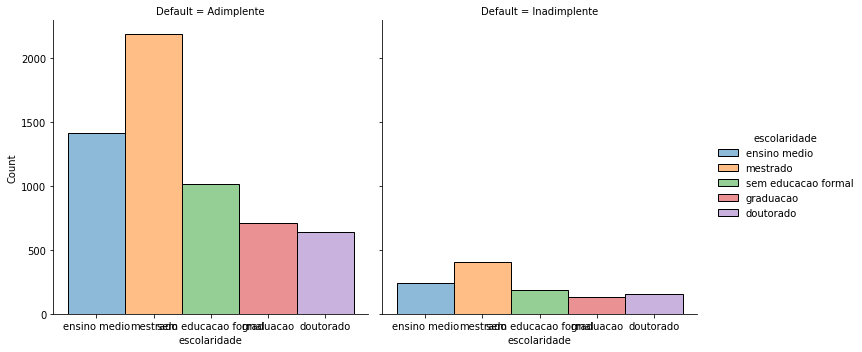

In [ ]:
fig_escolaridade = sns.displot(data = df, x = 'escolaridade', hue = 'escolaridade', col = 'Default')
plt.show(fig_escolaridade)

###**3.1.2\.  Salário anual**

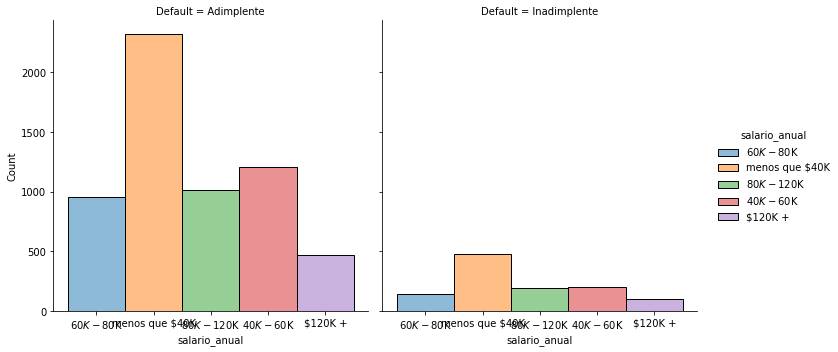

In [ ]:
fig_salario = sns.displot(data = df, x = 'salario_anual', hue = 'salario_anual', col = 'Default')

###**3.1.2\.  Estado civil**

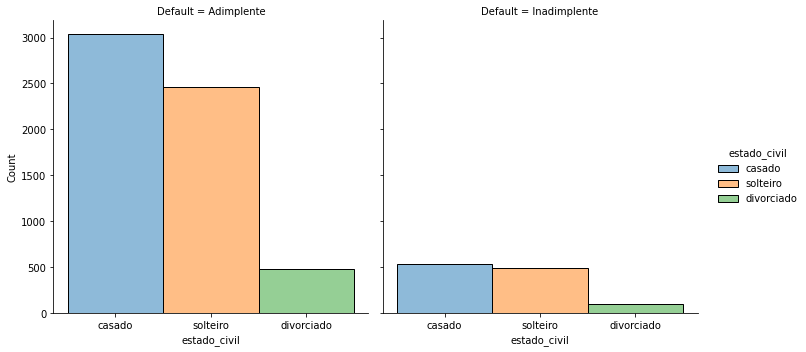

In [ ]:
fig_estado_civil = sns.displot(data = df, x = 'estado_civil', hue = 'estado_civil', col = 'Default')

## **3.2 Visualização de dados numéricos** 

In [ ]:
df.drop(['default', 'id'], axis = 1).select_dtypes('number').head()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


###**3.2.1\.  Valor das transações (últimos 12 meses)**

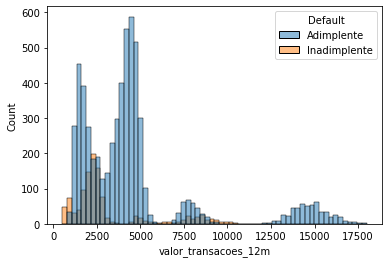

In [ ]:
fig = sns.histplot(data = df, x = "valor_transacoes_12m", hue = "Default")

### **3.2.1\.  Quantidade das transações (últimos 12 meses)**


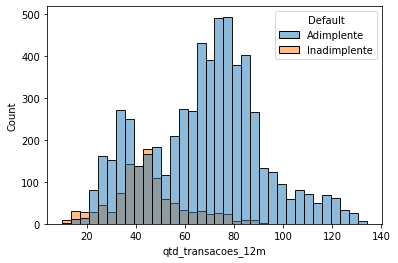

In [ ]:
fig = sns.histplot(data = df, x = "qtd_transacoes_12m", hue = "Default")

# **4. Insights** 

A partir da análise exploratória de dados, observa-se que:

* `Variáveis categórias`

Verifica-se que não há relação aparente entre o estado civil, escolaridade ou faixa salarial dos clientes e sua propensão a inadimplência, pois os gráficos evidenciam que a frequência  de pessoas adimplentes e inadimplentes em cada categoria é semelhante.

* `Variáveis numéricas`

Verifica-se uma relação diretamente proporcial entre a quantidade de transações e o valor das transações nos últimos 12 meses e a propensão do cliente à inadimplência. Ou seja, Quanto maior a quantidade de transações e valores transacionados, menor é chance de um cliente se tornar inadimplente. Por exemplo, enquanto um cliente inadimplente, em média, movimentou, nos últimos 12 meses, 2.500 reais na conta com uma média 40 transações, um cliente adimplente movimentou aproximadamente 5.000 reais com uma média de 80 transações. 
